In [16]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
np.set_printoptions(precision=3)
import sys
sys.path.append('../../zdrojaky')
from tsplot import tsplot
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, DeprecationWarning))

# Modelování časové řady COVID-19 pomocí AR modelu

*Zdroj dat: https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19*

Uvažujme datovou sadu svého času poskytovanou MZ ČR s následujícím popisem:

```Obsahem je komplexní přehled základních epidemiologických parametrů (počty diagnostikovaných osob s COVID-19, počty aktuálně nakažených, hospitalizovaní pacienti) se zaměřením na seniorní zranitelné skupiny obyvatel (kategorie věku 65+, 75+) na geografické úrovni obcí s rozšířenou působností (ORP).```

Schema CSV je podle poskytovatele následující:

```
den:string
datum:date
orp_kod:string
orp_nazev:string
incidence_7:integer
incidence_65_7:integer
incidence_75_7:integer
prevalence:integer
prevalence_65:integer
prevalence_75:integer
aktualni_pocet_hospitalizovanych_osob:integer
nove_hosp_7:integer
testy_7:integer
```

In [17]:
fn = 'orp.csv'
data = pd.read_csv(fn, index_col=1, parse_dates=True, 
                   infer_datetime_format=True)
data.head()

,den,orp_kod,orp_nazev,incidence_7,incidence_65_7,incidence_75_7,prevalence,prevalence_65,prevalence_75,aktualni_pocet_hospitalizovanych_osob,nove_hosp_7,testy_7
datum,,,,,,,,,,,,
2021-05-04,úterý,4207,Louny,90,10,2,179,25,6,12,9,459
2021-05-05,středa,4207,Louny,83,11,3,182,25,7,10,8,423
2021-05-06,čtvrtek,4207,Louny,83,13,4,160,23,7,11,6,368
2021-05-07,pátek,4207,Louny,63,10,4,145,20,5,12,7,349
2021-05-08,sobota,4207,Louny,59,9,4,153,21,6,11,6,354


Budeme si vybírat konkrétní ORP (obec s rozšířenou působností) a v ní jen určitou část období (proč?). Vykreslíme si průběh vybrané řady a ACF s PACF:

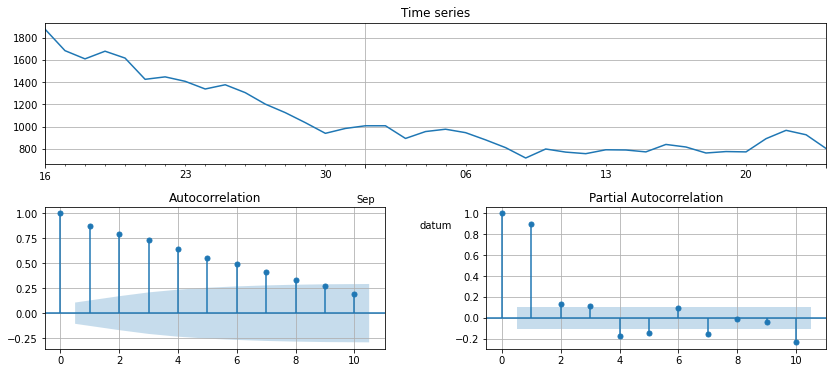

In [19]:
df_orig = data.loc[data['orp_nazev']=='Tábor']
df = df_orig['testy_7'].last('6W')
df = df.asfreq('D')

tsplot(df, lags=10)

...a dál už můžete sami :)